In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"avocado.csv")

In [3]:
1
dataframe.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
print(dataframe.groupby('AveragePrice').size())

AveragePrice
0.44    1
0.46    1
0.48    1
0.49    2
0.51    5
       ..
3.04    1
3.05    1
3.12    1
3.17    1
3.25    1
Length: 259, dtype: int64


In [6]:
print(dataframe.groupby('Total Bags').size())

Total Bags
0.00           15
3.09            1
3.11            1
3.19            1
3.33            1
               ..
15804696.31     1
15972492.07     1
16298296.29     1
16394524.11     1
19373134.37     1
Length: 18097, dtype: int64


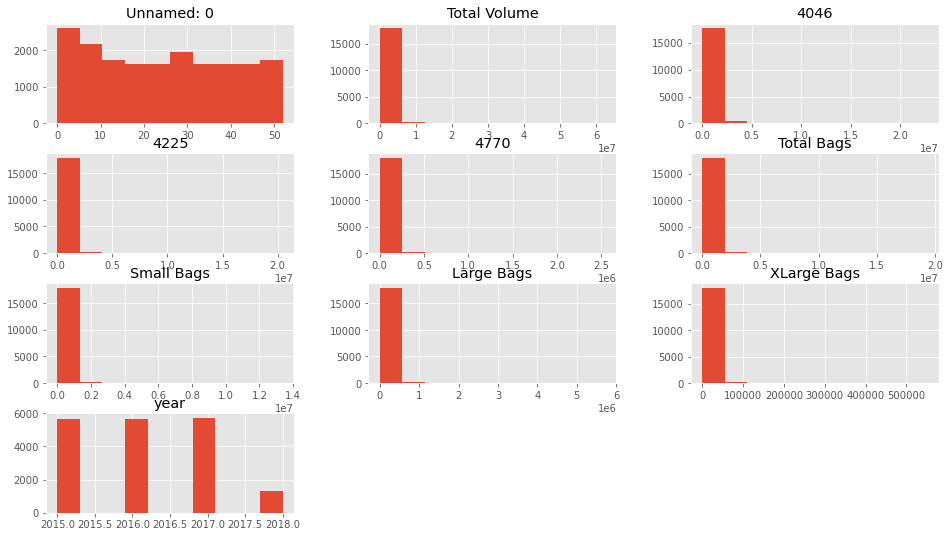

In [7]:
dataframe.drop(['AveragePrice'],1).hist()
plt.show()

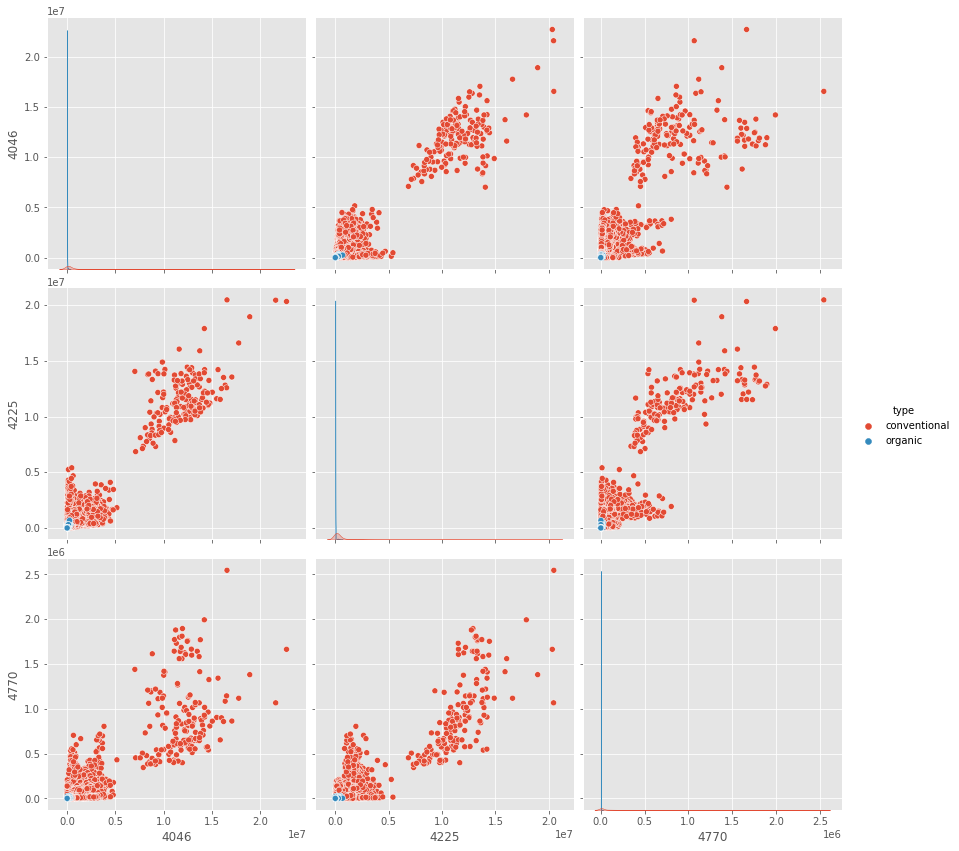

In [12]:
sb.pairplot(dataframe.dropna(), hue='type',height=4,vars=["4046","4225","4770"],kind='scatter')

In [16]:
X = np.array(dataframe[["4046","4225","4770"]])
y = np.array(dataframe['type'])
X.shape
print(y[:50])

['conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional']


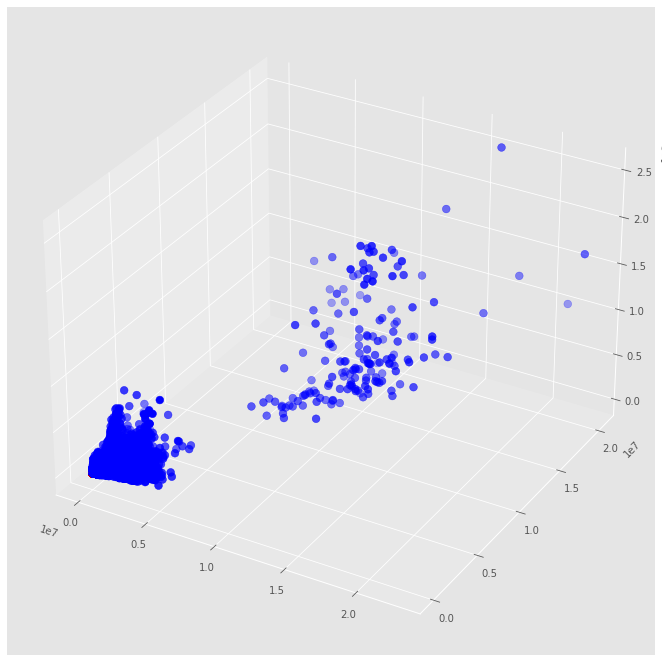

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red']
asignar=[]
for row in y:
 if(row=='organic'):
    asignar.append(colores[1])
 else:
        asignar.append(colores[0])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

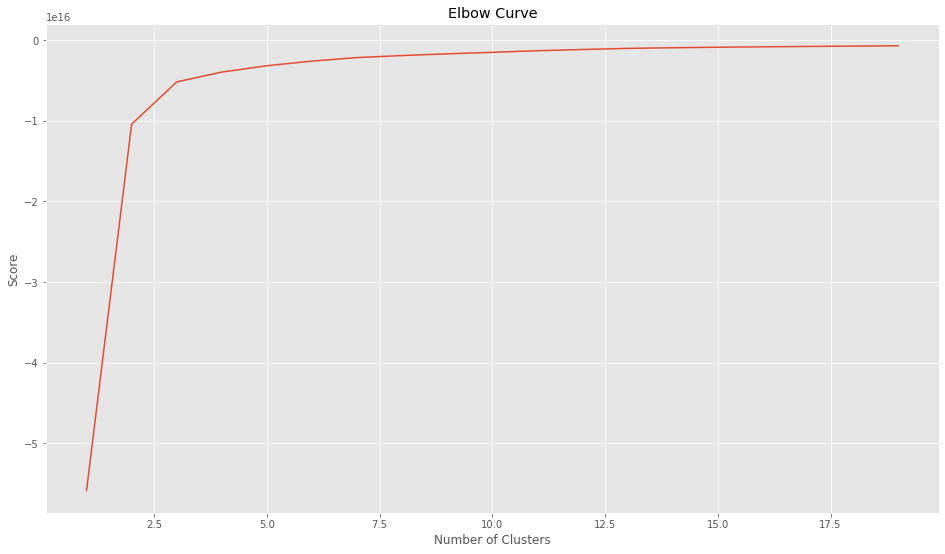

In [19]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


[[1.65286890e+06 1.53725882e+06 1.23815701e+05]
 [7.64958615e+04 9.12091416e+04 6.50445064e+03]
 [1.20109813e+07 1.16148609e+07 9.18703964e+05]]


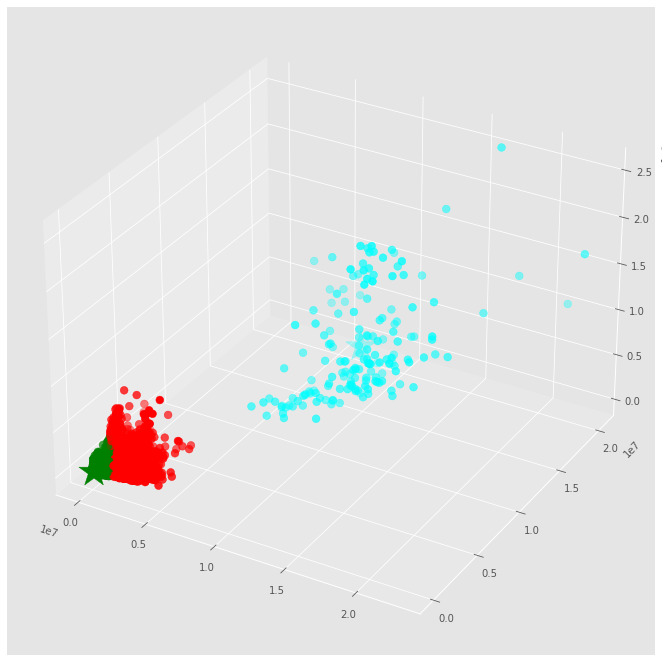

In [21]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
 asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)